In [1]:
!pip install GEOparse 
import GEOparse

#name of the gene id
gse_ids = ["GSE21422"]

# Directory to save the data
output_dir = "geo_datasets/"

# Create the directory if it doesn't exist
import os
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Download and parse the dataset
for gse_id in gse_ids:
    print(f"Downloading {gse_id}...")
    gse = GEOparse.get_GEO(geo=gse_id, destdir=output_dir)
    print(f"Downloaded {gse_id} and saved to {output_dir}")


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for GEOparse from https://files.pythonhosted.org/packages/e7/4a/b6a3e141c21e4d4b72b0c11231c1d88a8bae127f43921c5dea391b299b2a/GEOparse-2.0.4-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


06-Dec-2024 23:19:40 DEBUG utils - Directory geo_datasets/ already exists. Skipping.
06-Dec-2024 23:19:40 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE21nnn/GSE21422/soft/GSE21422_family.soft.gz to geo_datasets/GSE21422_family.soft.gz


100%|██████████| 18.6M/18.6M [00:04<00:00, 4.86MB/s]
06-Dec-2024 23:19:44 DEBUG downloader - Size validation passed
06-Dec-2024 23:19:44 DEBUG downloader - Moving /scratch/300233.1.ood/tmp8ykta28g to /projectnb/bf550/students/abasyal/Proj2/geo_datasets/GSE21422_family.soft.gz
06-Dec-2024 23:19:44 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE21nnn/GSE21422/soft/GSE21422_family.soft.gz
06-Dec-2024 23:19:44 INFO GEOparse - Parsing geo_datasets/GSE21422_family.soft.gz: 
06-Dec-2024 23:19:44 DEBUG GEOparse - DATABASE: GeoMiame
06-Dec-2024 23:19:44 DEBUG GEOparse - SERIES: GSE21422
06-Dec-2024 23:19:44 DEBUG GEOparse - PLATFORM: GPL570
/usr4/bf591/abasyal/.local/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
06-Dec-2024 23:19:46 DEBUG GEOparse - SAMPLE: GSM535604
06-Dec-2024 23:19:46 DEBU

Downloaded GSE21422 and saved to geo_datasets/


In [3]:

# Path to the downloaded GSE file
file_path = "geo_datasets/GSE21422_family.soft.gz"

# Parse the .soft.gz file
gse = GEOparse.get_GEO(filepath=file_path)

# Check the parsed data
print(f"Data parsed from {file_path}:", gse)


06-Dec-2024 23:24:26 INFO GEOparse - Parsing geo_datasets/GSE21422_family.soft.gz: 
06-Dec-2024 23:24:26 DEBUG GEOparse - DATABASE: GeoMiame
06-Dec-2024 23:24:26 DEBUG GEOparse - SERIES: GSE21422
06-Dec-2024 23:24:26 DEBUG GEOparse - PLATFORM: GPL570
/usr4/bf591/abasyal/.local/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
06-Dec-2024 23:24:27 DEBUG GEOparse - SAMPLE: GSM535604
06-Dec-2024 23:24:27 DEBUG GEOparse - SAMPLE: GSM535605
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535606
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535607
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535608
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535609
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535610
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535611
06-Dec-2024 23:24:28 DEBUG GEOparse - SAMPLE: GSM535612
06-

Data parsed from geo_datasets/GSE21422_family.soft.gz: <SERIES: GSE21422 - 19 SAMPLES, 1 d(s)>


In [4]:
# Extract the expression data
expression_data = gse.pivot_samples('VALUE')

# Check the first few rows of the expression data
print(expression_data.head())

# Save the expression data to a CSV file
expression_data.to_csv("expression_data.csv")


name         GSM535604    GSM535605    GSM535606    GSM535607    GSM535608  \
ID_REF                                                                       
1007_s_at  1230.617900  1871.292800  1827.731300  1207.527000  2359.770000   
1053_at     157.605770   123.088810   187.250990   136.632450   220.528980   
117_at      130.887560    42.366425    17.647919    41.040417    45.464470   
121_at       45.262120    60.437325    57.155807    46.159718    54.007340   
1255_g_at     4.900485     4.794953     4.824915     4.933097     4.811179   

name         GSM535609    GSM535610    GSM535611    GSM535612   GSM535613  \
ID_REF                                                                      
1007_s_at  2216.724900  2786.898400  1899.386000  1534.739900  116.077990   
1053_at     122.208300   240.972780   205.366880   253.854300  118.585500   
117_at       22.630410    37.761790    43.687096    73.613680   44.807110   
121_at       57.827103    59.489838    57.861538    61.063046   63.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the expression data
expression_data = pd.read_csv('expression_data.csv', index_col=0)

# Display the first few rows to check if the data is loaded correctly
expression_data.head()


,GSM535604,GSM535605,GSM535606,GSM535607,GSM535608,GSM535609,GSM535610,GSM535611,GSM535612,GSM535613,GSM535614,GSM535615,GSM535616,GSM535617,GSM535618,GSM535619,GSM535620,GSM535621,GSM535622
ID_REF,,,,,,,,,,,,,,,,,,,
1007_s_at,1230.617900,1871.292800,1827.731300,1207.527000,2359.770000,2216.724900,2786.898400,1899.386000,1534.739900,116.077990,671.773600,1358.547500,164.984500,531.585270,1322.161600,2659.021000,2688.102000,5452.768000,556.091250
1053_at,157.605770,123.088810,187.250990,136.632450,220.528980,122.208300,240.972780,205.366880,253.854300,118.585500,97.949030,169.454330,107.066220,102.984610,269.093600,347.881560,412.738740,185.346180,239.126220
117_at,130.887560,42.366425,17.647919,41.040417,45.464470,22.630410,37.761790,43.687096,73.613680,44.807110,96.263420,18.622225,45.366990,45.127186,38.556095,36.210560,102.787650,40.874992,73.113520
121_at,45.262120,60.437325,57.155807,46.159718,54.007340,57.827103,59.489838,57.861538,61.063046,63.005257,68.306150,57.808890,61.522057,54.923540,65.047910,57.221570,57.879170,54.863464,57.245308
1255_g_at,4.900485,4.794953,4.824915,4.933097,4.811179,4.884846,4.749608,4.835877,4.826107,4.835642,4.812844,4.853315,4.852467,4.893585,4.914433,4.832902,4.975999,4.730912,4.753218


In [18]:

expression_data = expression_data.T
expression_data

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
GSM535604,1231,158,131,45,5,128,11,6,591,7,...,156,1106,1105,1359,3581,2952,23034,14093,47258,40565
GSM535605,1871,123,42,60,5,97,10,6,286,7,...,160,1189,1331,1482,3872,3279,25240,14740,53966,44894
GSM535606,1828,187,18,57,5,106,10,6,1368,7,...,171,1213,1223,1462,3733,3110,23829,13993,50408,42941
GSM535607,1208,137,41,46,5,91,10,7,632,7,...,182,1005,951,1192,3165,2412,22620,12554,48075,36448
GSM535608,2360,221,45,54,5,95,10,6,713,7,...,139,948,1034,1150,2992,2398,20125,11560,47738,40166
GSM535609,2217,122,23,58,5,92,11,6,1908,7,...,197,972,988,1106,3130,2784,22246,12603,46413,38549
GSM535610,2787,241,38,59,5,94,14,6,203,7,...,127,1120,1111,1313,3697,2929,25190,14253,55269,46182
GSM535611,1899,205,44,58,5,59,13,6,467,7,...,163,1021,1015,1147,2995,2472,22367,12350,47738,40734
GSM535612,1535,254,74,61,5,60,11,6,166,7,...,134,1066,1074,1324,3271,2724,23261,13168,51183,42361
GSM535613,116,119,45,63,5,113,12,6,152,7,...,272,901,778,881,2682,2054,19392,10961,48805,37140


In [16]:
metadata = pd.DataFrame(zip(expression_data.index, ['DCIS','DCIS','DCIS','DCIS','DCIS','DCIS','DCIS','DCIS','DCIS','H','H','H','H','H','IDC','IDC','IDC','IDC','IDC']),
                        columns = ['Sample', 'Condition'])
metadata = metadata.set_index('Sample')
metadata


,Condition
Sample,
GSM535604,DCIS
GSM535605,DCIS
GSM535606,DCIS
GSM535607,DCIS
GSM535608,DCIS
GSM535609,DCIS
GSM535610,DCIS
GSM535611,DCIS
GSM535612,DCIS


In [4]:
%pip install pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Round the expression data to integers
expression_data = expression_data.round().astype(int)

# creating the DeseqDataSet 
dds = DeseqDataSet(counts=expression_data, metadata=metadata, design_factors='Condition')

In [6]:
dds.deseq2()


Fitting size factors...
... done in 0.10 seconds.

Fitting dispersions...
... done in 4.14 seconds.

Fitting dispersion trend curve...
/usr4/bf591/abasyal/.local/lib/python3.10/site-packages/pydeseq2/dds.py:727: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend(vst)
... done in 1.33 seconds.

Fitting MAP dispersions...
... done in 5.21 seconds.

Fitting LFCs...
... done in 4.16 seconds.

Calculating cook's distance...
... done in 0.10 seconds.

Replacing 993 outlier genes.

Fitting dispersions...
... done in 0.34 seconds.

Fitting MAP dispersions...
... done in 0.33 seconds.

Fitting LFCs...
... done in 0.37 seconds.



In [7]:
dds

AnnData object with n_obs × n_vars = 19 × 54675
    obs: 'Condition'
    uns: 'mean_disp', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'

In [8]:
# DCIS vs Healthy (H)
stat_res_dcis_h = DeseqStats(dds, contrast=('Condition', 'DCIS', 'H'))

# DCIS vs IDC
stat_res_dcis_idc = DeseqStats(dds, contrast=('Condition', 'DCIS', 'IDC'))

# Healthy (H) vs IDCb
stat_res_h_idc = DeseqStats(dds, contrast=('Condition', 'H', 'IDC'))


In [9]:
stat_res_dcis_h.summary()
stat_res_dcis_idc.summary()
stat_res_h_idc.summary()

Running Wald tests...
... done in 3.59 seconds.



Log2 fold change & Wald test p-value: Condition DCIS vs H
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_REF                                                                   
1007_s_at              1721.290537        1.727335  0.498321  3.466313   
1053_at                 195.874067        0.621897  0.241618  2.573882   
117_at                   52.835061        0.018210  0.436731  0.041697   
121_at                   58.053074       -0.143608  0.143462 -1.001021   
1255_g_at                 5.031408        0.001714  0.400135  0.004283   
...                            ...             ...       ...       ...   
AFFX-r2-Ec-bioC-5_at   2766.628194        0.037442  0.118696  0.315444   
AFFX-r2-Ec-bioD-3_at  23124.289998        0.041869  0.076185  0.549572   
AFFX-r2-Ec-bioD-5_at  13316.707341        0.046689  0.099523  0.469129   
AFFX-r2-P1-cre-3_at   50951.311366       -0.021862  0.072093 -0.303256   
AFFX-r2-P1-cre-5_at   41692.395989        0.037539  0.

Running Wald tests...
... done in 3.76 seconds.



Log2 fold change & Wald test p-value: Condition DCIS vs IDC
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_REF                                                                   
1007_s_at              1721.290537       -0.432373  0.497751 -0.868652   
1053_at                 195.874067       -0.665539  0.237321 -2.804390   
117_at                   52.835061       -0.206544  0.435372 -0.474410   
121_at                   58.053074       -0.078619  0.144599 -0.543703   
1255_g_at                 5.031408       -0.001181  0.400135 -0.002950   
...                            ...             ...       ...       ...   
AFFX-r2-Ec-bioC-5_at   2766.628194        0.033381  0.118695  0.281230   
AFFX-r2-Ec-bioD-3_at  23124.289998       -0.011511  0.076181 -0.151095   
AFFX-r2-Ec-bioD-5_at  13316.707341       -0.035023  0.099514 -0.351936   
AFFX-r2-P1-cre-3_at   50951.311366       -0.068458  0.072091 -0.949600   
AFFX-r2-P1-cre-5_at   41692.395989       -0.035532  

Running Wald tests...
... done in 3.57 seconds.



Log2 fold change & Wald test p-value: Condition H vs IDC
                          baseMean  log2FoldChange     lfcSE      stat  \
ID_REF                                                                   
1007_s_at              1721.290537       -2.159708  0.564863 -3.823419   
1053_at                 195.874067       -1.287436  0.271795 -4.736798   
117_at                   52.835061       -0.224755  0.494076 -0.454899   
121_at                   58.053074        0.064989  0.162094  0.400934   
1255_g_at                 5.031408       -0.002894  0.453711 -0.006379   
...                            ...             ...       ...       ...   
AFFX-r2-Ec-bioC-5_at   2766.628194       -0.004061  0.134598 -0.030172   
AFFX-r2-Ec-bioD-3_at  23124.289998       -0.053380  0.086384 -0.617934   
AFFX-r2-Ec-bioD-5_at  13316.707341       -0.081712  0.112844 -0.724113   
AFFX-r2-P1-cre-3_at   50951.311366       -0.046595  0.081743 -0.570017   
AFFX-r2-P1-cre-5_at   41692.395989       -0.073070  0.0

In [10]:
res1 = stat_res_dcis_h.results_df
res2 = stat_res_dcis_idc.results_df
res3 = stat_res_h_idc.results_df

In [11]:
res1

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ID_REF,,,,,,
1007_s_at,1721.290537,1.727335,0.498321,3.466313,0.000528,0.003795
1053_at,195.874067,0.621897,0.241618,2.573882,0.010056,0.042014
117_at,52.835061,0.018210,0.436731,0.041697,0.966740,0.995852
121_at,58.053074,-0.143608,0.143462,-1.001021,0.316817,0.555805
1255_g_at,5.031408,0.001714,0.400135,0.004283,0.996583,NaN
...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,2766.628194,0.037442,0.118696,0.315444,0.752425,0.922729
AFFX-r2-Ec-bioD-3_at,23124.289998,0.041869,0.076185,0.549572,0.582613,0.807182
AFFX-r2-Ec-bioD-5_at,13316.707341,0.046689,0.099523,0.469129,0.638977,0.849042


In [12]:
res2

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ID_REF,,,,,,
1007_s_at,1721.290537,-0.432373,0.497751,-0.868652,0.385037,0.709381
1053_at,195.874067,-0.665539,0.237321,-2.804390,0.005041,0.059196
117_at,52.835061,-0.206544,0.435372,-0.474410,0.635208,0.883466
121_at,58.053074,-0.078619,0.144599,-0.543703,0.586646,0.856306
1255_g_at,5.031408,-0.001181,0.400135,-0.002950,0.997646,NaN
...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,2766.628194,0.033381,0.118695,0.281230,0.778534,0.953292
AFFX-r2-Ec-bioD-3_at,23124.289998,-0.011511,0.076181,-0.151095,0.879901,0.981737
AFFX-r2-Ec-bioD-5_at,13316.707341,-0.035023,0.099514,-0.351936,0.724886,0.930587


In [13]:
res3

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ID_REF,,,,,,
1007_s_at,1721.290537,-2.159708,0.564863,-3.823419,0.000132,0.000934
1053_at,195.874067,-1.287436,0.271795,-4.736798,0.000002,0.000026
117_at,52.835061,-0.224755,0.494076,-0.454899,0.649182,0.847163
121_at,58.053074,0.064989,0.162094,0.400934,0.688469,0.878160
1255_g_at,5.031408,-0.002894,0.453711,-0.006379,0.994910,NaN
...,...,...,...,...,...,...
AFFX-r2-Ec-bioC-5_at,2766.628194,-0.004061,0.134598,-0.030172,0.975930,0.997146
AFFX-r2-Ec-bioD-3_at,23124.289998,-0.053380,0.086384,-0.617934,0.536619,0.750332
AFFX-r2-Ec-bioD-5_at,13316.707341,-0.081712,0.112844,-0.724113,0.468996,0.685698


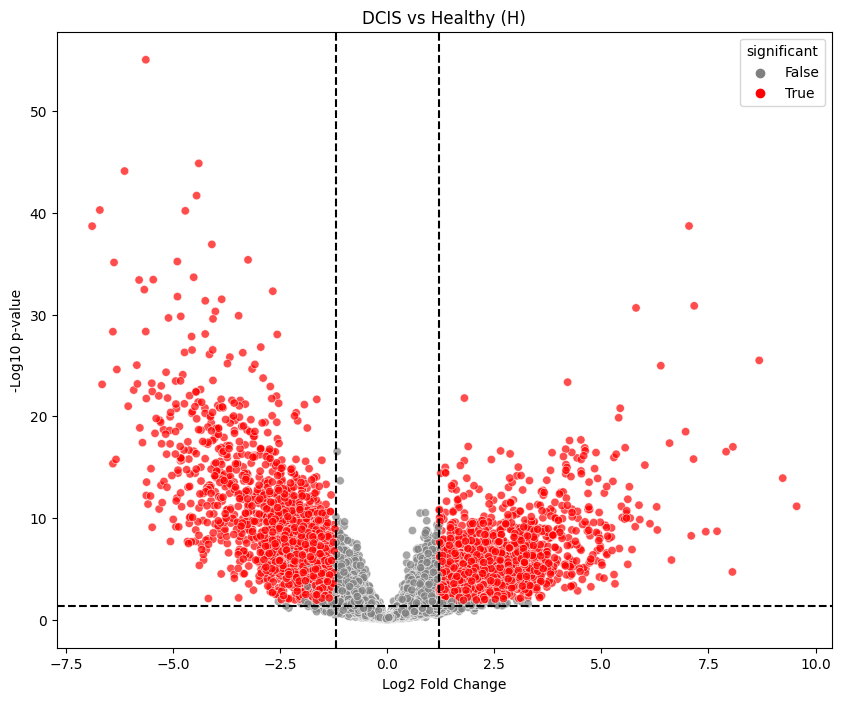

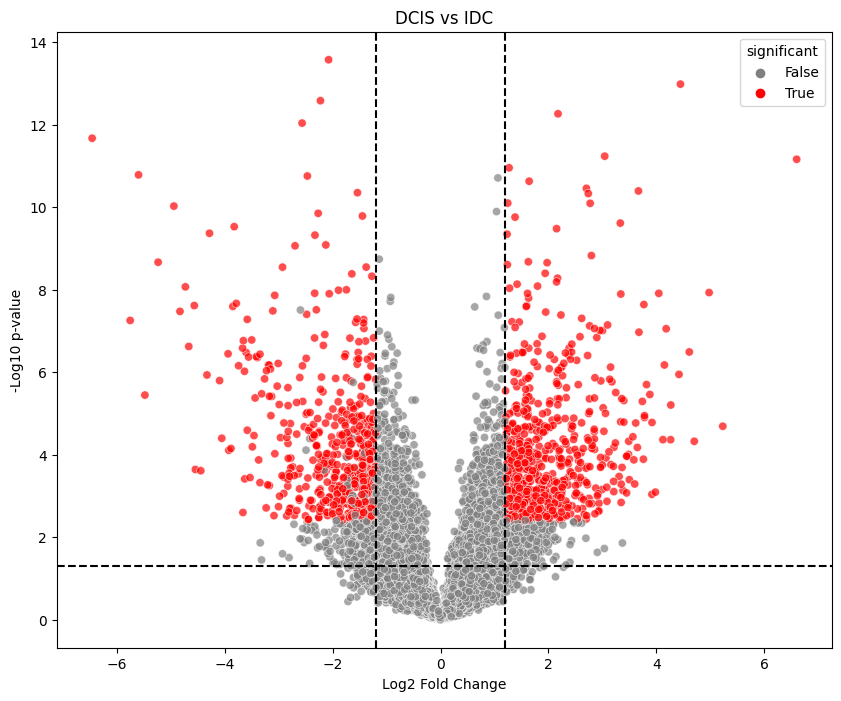

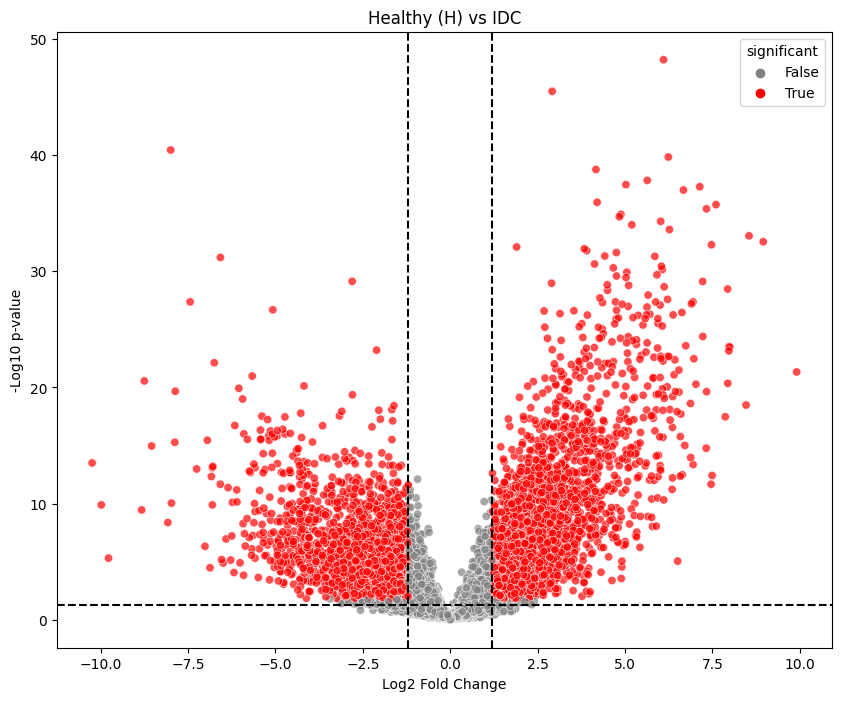

In [24]:
import seaborn as sns


def volcano_plot(results_df, title):
    # Set the fold change threshold to 1.2 
    results_df['significant'] = (results_df['padj'] < 0.05) & (abs(results_df['log2FoldChange']) > 1.2)

    # Plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=results_df, x='log2FoldChange', y=-np.log10(results_df['pvalue']), hue='significant', palette={True: 'red', False: 'gray'}, alpha=0.7)

    plt.title(title)
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10 p-value')
    plt.axhline(y=-np.log10(0.05), color='black', linestyle='--')  # Line for p-value threshold
    plt.axvline(x=1.2, color='black', linestyle='--')  # Line for log2 fold change threshold (updated)
    plt.axvline(x=-1.2, color='black', linestyle='--')  # Line for log2 fold change threshold (updated)

    plt.show()

# Plot for DCIS vs Healthy (H)
volcano_plot(res1, 'DCIS vs Healthy (H)')

# Plot for DCIS vs IDC
volcano_plot(res2, 'DCIS vs IDC')

# Plot for Healthy (H) vs IDC
volcano_plot(res3, 'Healthy (H) vs IDC')


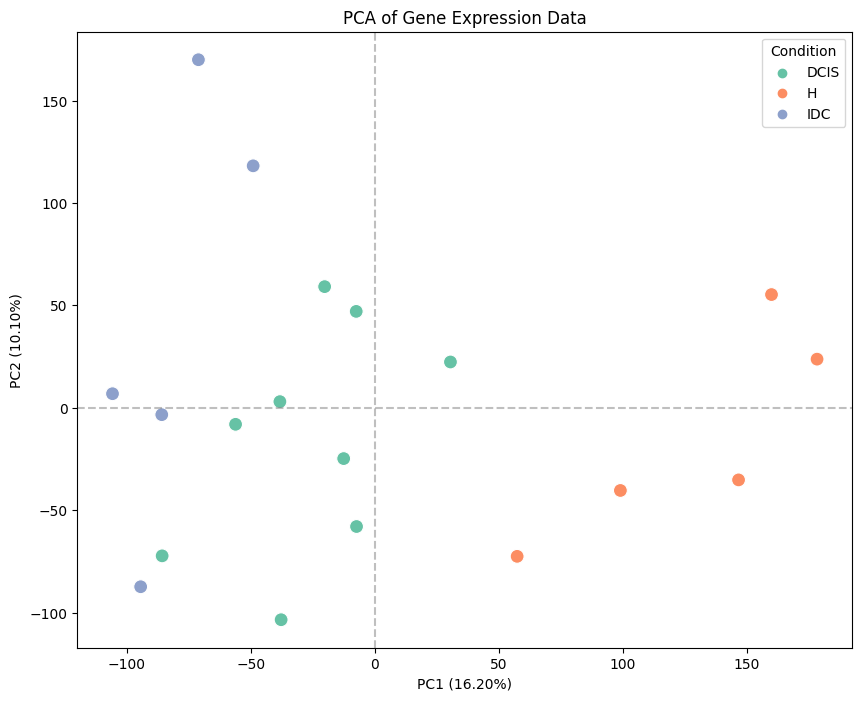

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(expression_data)  

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a PCA DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Condition'] = metadata['Condition'].values

# Plot PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Condition', data=pca_df, palette='Set2', s=100)
plt.title('PCA of Gene Expression Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.axhline(0, linestyle='--', color='grey', alpha=0.5)
plt.axvline(0, linestyle='--', color='grey', alpha=0.5)
plt.show()
